## Table of Contents
* [Introduction](#Intro)
* [Exercice 1](#Ex1)
* [Exercice 2](#Ex2)
* [Exercice 3](#Ex3)
* [Exercice 4](#Ex4)

# Introduction <a class="anchor" id="Intro"></a>

This repository aims to get familiarized with Numpy in the creation of arrays and with the different functions implemented.

# Exercice 1 <a class="anchor" id="Ex1"></a>

## Objective: Implement a function that given a one-dimensional array provides a statistic summary

In [1]:
import pandas as pd
import numpy as np

In [4]:
def stats_array(array_,freedom=0):
    '''
    This function returns a statistic summary of a one-dimensional array.
    
    Parameters
    ----------
    array_: The array that we want to get the stats. 
    ddof:   Delta Degrees of Freedom for std. The divisor used in calculations is N - ddof, where N represents the number of elements.
            To have the same behaviour as pandas, use ddof=1.
    -------
    Returns
    -------
    Error:  If the dimension of the array is larger than 1
    statistics: Dictionary with the stats, similar to the describe() function of pandas. 

    ''' 
    if array_.ndim >1:
        print('Error!')
    else:
        statistics ={'count':array_.size,'mean':np.mean(array_), 'median': np.median(array_), 'std': np.std(array_,ddof=freedom), 'var': np.var(array_),'min':np.min(array_),'max':np.max(array_), '25%': np.quantile(array_,0.25),'50%': np.quantile(array_,0.5), '75%': np.quantile(array_,0.75)}
        return statistics

In [2]:
array_1D=np.random.rand(10)
print(array_1D)
                                 

[0.75957946 0.10905043 0.18955088 0.56312698 0.96272055 0.45165183
 0.751581   0.39598544 0.98393875 0.44099768]


In [5]:
df1=pd.DataFrame.from_dict(stats_array(array_1D,0), orient='index', columns=['ddof=0'])
df2=pd.DataFrame.from_dict(stats_array(array_1D,1), orient='index', columns=['ddof=1'])
df3=pd.DataFrame(array_1D, columns=['Pandas']).describe()
df=pd.concat([df1, df2,df3], axis=1)
display(df)

,ddof=0,ddof=1,Pandas
count,10.000000,10.000000,10.000000
mean,0.560818,0.560818,0.560818
median,0.507389,0.507389,NaN
std,0.284927,0.300340,0.300340
var,0.081184,0.081184,NaN
min,0.109050,0.109050,0.109050
max,0.983939,0.983939,0.983939
25%,0.407238,0.407238,0.407238
50%,0.507389,0.507389,0.507389
75%,0.757580,0.757580,0.757580


As we can observe in the table above, there is some differences between our function, *stats_array()* and the bult-in function of *pandas*, *describe()* which is also based on *NumPy*. This is due to the difference definition of standard desviation that it is used. *Describe* uses the unbiased definition of standard desviation, while numpy by default uses the biased (see above expressions, and [Wikipedia](https://en.wikipedia.org/wiki/Standard_deviation), for more information about the difference between both expressions). In any case, when the sample is large, i.e., $N\gg1$, both $\sigma$ converge. Another difference between our function and the *describe()* method is that it does not computes the *variance* nor the *median*.  

$$
\begin{align*}
s_{\text{Biased}}=\sqrt{\dfrac{1}{N}\sum_{i=1}^{N}(x_i-\bar{x})^2}\\
s_{\text{Unbiased}}=\sqrt{\dfrac{1}{N-1}\sum_{i=1}^{N}(x_i-\bar{x})^2} \\
\text{If N}\gg 1:\\
s_{\text{Biased}}\approx s_{\text{Unbiased}}
\end{align*}
$$

In [262]:
# Verification for a two-dimensional array.
array_2D=np.random.rand(2,2)
stats_array(array_2D)

Error!


# Exercice 2 <a class="anchor" id="Ex2"></a>

## Objective: Implement a function that generates a matrix of NxN with random numbers between 0 and 100

In [8]:
def aleatory_square(n, a=0,b=100):
    '''
    This function returns a nxm matrix, with aleatory numbers generated between a and b.
    ----------   
    Parameters
    ----------
    n: Order of the matrix
    a: Minimum value
    b: Maximum value
    -------
    Returns
    -------
    data: nxn matrix with random numbers between a and b. 

    ''' 
    data=(b-a) * np.random.random_sample((n, n)) +a
    return data

In [9]:
aleatory_square(3)

array([[30.21439404, 71.5907391 , 61.62391089],
       [39.56958334, 22.2003051 , 84.50479783],
       [59.88816724, 54.50984389,  1.18805084]])

# Exercice 3 <a class="anchor" id="Ex3"></a>

## Objective: Implement a function that computes the sum  of the rows or of the columns 

In [38]:
def colsum_or_rowsum(array):
    '''
    This function returns the sum per rows and columns
    ----------   
    Parameters
    ----------
    array: Array we want to calculate the sum per rows and columns
    -------
    Returns
    -------
    sum_rowandcol: Dictionary made with col_sum (sum per columns) and col_row (sum per rows)

    ''' 
    col_sum=np.sum(array, axis=0)
    row_sum=np.sum(array, axis=1)
    sum_rowandcol={'row_sum': row_sum, 'col_sum':col_sum}
    return sum_rowandcol

In [39]:
array_2D=np.random.rand(3,3)
array_2D

array([[0.03889757, 0.42148537, 0.65037423],
       [0.02186968, 0.02311517, 0.83864787],
       [0.10628379, 0.77943666, 0.09943537]])

In [40]:
colsum_or_rowsum(array_2D)

{'row_sum': array([1.11075717, 0.88363271, 0.98515582]),
 'col_sum': array([0.16705103, 1.2240372 , 1.58845747])}

# Exercice 4 <a class="anchor" id="Ex4"></a>

## Objective: Implement a function that calculates the Pearson coefficient

## Introduction

Correlation is the statistical analysis of the relationship between two variables. The study of the correlation between two set of variables allow us to adress the strength and the direction of the relationship between them.

Correlations have many real-world applications. They can help us answer questions, such as whether there is a link between the use of cars and the level of air pollution of Barcelona or if there's a link between the historical GDP of a country and the evolution of the salary the citizens. 

The study of correlation is essential in many data science tasks. It is a key component in data exploratory analysis; the initial study we conduct in our data to see how it looks, to summarize its main characteristics, and to discover partners and anomalies. Finally, correlation also plays a critical role on machine learning algorithms, as some algorithms do not work properlty if two variables or more are closeley correlated. 

There are different types of correlation: 
1. Positive Correlation: Two variables are positively correlated when their values change in the same direction. For example, in the image below, as the value for X increases, so does the value for Y at a constant rate.

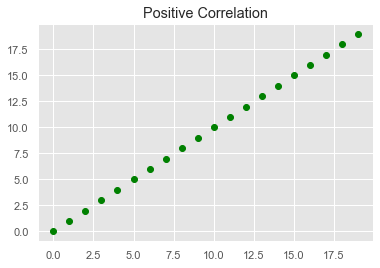


2. Neutral Correlation: The change of the two variables are independent.

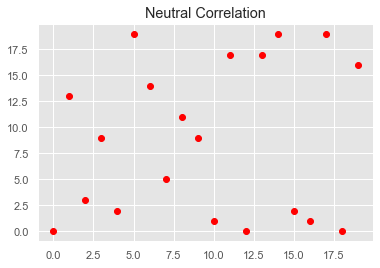

3. Negative correlation: Two variables are negative correlated when their values change in opposite directions.For example, in the image below, as the value for X increases,  the value of  Y decreases at a constant rate. 

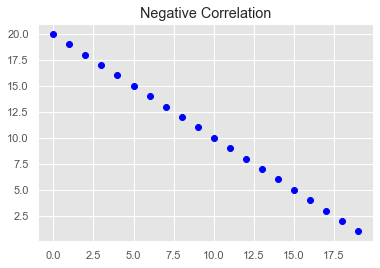


There are different coefficient to calculate the correlation, being the *Pearson coeffiecient*, one of the most widely used:

$$ 
r_{\text{Pearson}}=\dfrac{\sum_{i=1}^{N}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{N}(x_i-\bar{x})^2\sum_{i=1}^{N}(y_i-\bar{y})^2}}
$$

In [27]:
def corr_pearson(array):
    x=array[0]
    y=array[1]
    r=np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sqrt(np.sum((x-np.mean(x))**2)*np.sum((y-np.mean(y))**2))
    
    return 'The Pearson coefficient is: '+str(r) 

In [25]:
array_2D=np.random.rand(2,100)

corr_pearson(array_2D)

'The Pearson coefficient is:-0.03811479623318882'

We may compare our result with the one provided by the *corrcoef* function implemented in Numpy. In this case, the output is the correlation matrix, and the correlation coefficient that we are interested to are the ones of the secondary diagonal. Hence we select the element [0][1] of the correlation matrix: 

In [37]:
print('The Pearson coefficient with the Numpy function is: '+str(np.corrcoef(array_2D)[0][1]))

The Pearson coefficient with the Numpy function is: -0.03811479623318882


As expected, the *Pearson correlation factor* computed by our function and the one implemented in *Numpy* is the same.

### Example: Experience vs salary data

In [31]:
experience = [1, 3, 4, 5, 5, 6, 7, 10, 11, 12, 15, 20, 25, 28, 30, 35]

salary = [20000, 30000, 40000, 45000, 55000, 60000, 80000, 100000, 130000, 150000, 200000, 230000, 250000, 300000, 350000, 400000]

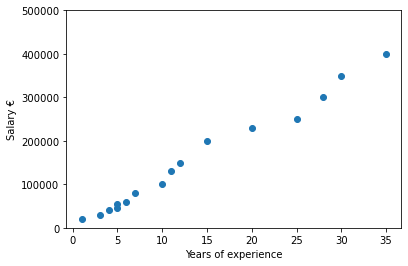

In [192]:
from matplotlib import pyplot as plt 

plt.scatter(experience,salary)
plt.xlabel('Years of experience')
plt.ylabel('Salary €')
plt.ylim(0,500000)
plt.show()

The representation of the data shows a positive linear response, suggesting a strong and positive correlation. Let's compute it: 

In [32]:
test_pearson_2=np.array([experience,salary])

In [33]:
corr_pearson(test_pearson_2)

'The Pearson coefficient is: 0.9929845761480398'

In [36]:
print('The Pearson coefficient with the Numpy function is: '+str(np.corrcoef(test_pearson_2)[0][1]))

The Pearson coefficient with the Numpy function is: 0.9929845761480398
